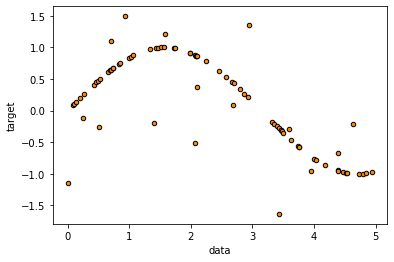

In [1]:
# Import the necessary modules and libraries
import numpy as np
import matplotlib.pyplot as plt

# Create a random dataset

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
           c="darkorange", label="data")
plt.xlabel("data")
plt.ylabel("target")
plt.show()

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
# Fit regression model
regr_1 = DecisionTreeRegressor(criterion='mse')
regr_1.fit(X, y)
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)

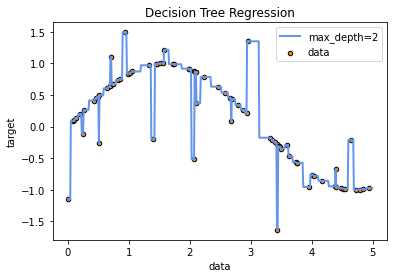

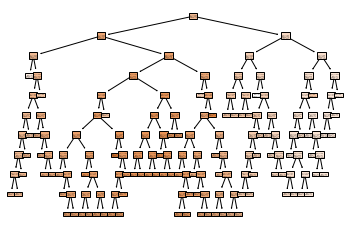

In [3]:
# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# Plot the regression trees
fig = plt.figure()
fig = tree.plot_tree(regr_1, filled=True)


<function matplotlib.pyplot.show(*args, **kw)>

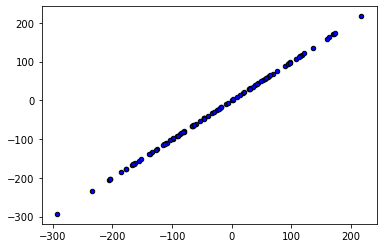

In [28]:
## Import data and a target variable to train
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

### Can change the num features and n_informative to make the RF better or worse at predicting
X,y = make_regression(n_features=10, n_informative=2,random_state=0, shuffle=True)
#X,y = make_regression(n_features=100, n_informative=99,random_state=0, shuffle=True)##This model is the worse at predicting
plt.scatter(y,y,s=20, edgecolor="black", c="blue", label="data")
plt.show
 # This plot is showing the data plotted against itself, a typical plot to show how well a RF fits the data

r^2 =  0.9276674522194255
out of bag R^2 =  0.5349186078292925
100


<function matplotlib.pyplot.show(*args, **kw)>

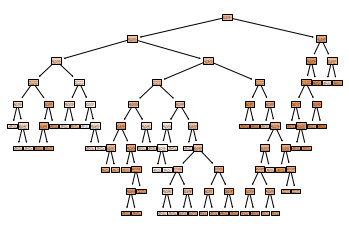

In [29]:
## Make a random forest prediction
# Create a random forest
#regr = RandomForestRegressor(max_depth=9, random_state=0,oob_score = True) #This is the good fit
regr = RandomForestRegressor(max_depth=9, random_state=0,oob_score = True,max_features=1) #This is the overfitting
# Create fits of Y, using X as predictors
regr.fit(X,y)

# Make a prediction of y, using X, see what the r-squared is
fit_x = regr.predict(X)
rsquared = regr.score(X, y, sample_weight=None)
print('r^2 = ', rsquared)

# Out of bag fit
oob = regr.oob_score_
print('out of bag R^2 = ', oob)

## See how any tree from this forest looks 

estimator = regr.estimators_
print(len(estimator))
plt.figure()

### one can change the [1] to any number 1-100 to see that tree
# A random forest is just a lot of decisions done, and then ensembled in some way
# for a RF regression, the answer is the average of all trees

tree.plot_tree(estimator[1],
               filled = True);
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

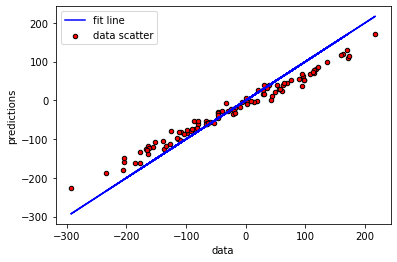

In [30]:
## Visualize fit
plt.plot(y,y,c="blue", label="fit line")
plt.scatter(y, fit_x, s=20, edgecolor="black",c="red", label="data scatter")
plt.xlabel("data")
plt.ylabel("predictions")
plt.legend()
plt.show

Feature ranking:
1. feature 3 (0.196963)
2. feature 6 (0.194304)
3. feature 9 (0.087238)
4. feature 1 (0.086792)
5. feature 5 (0.079503)
6. feature 8 (0.076138)
7. feature 2 (0.075959)
8. feature 4 (0.071822)
9. feature 7 (0.071691)
10. feature 0 (0.059589)


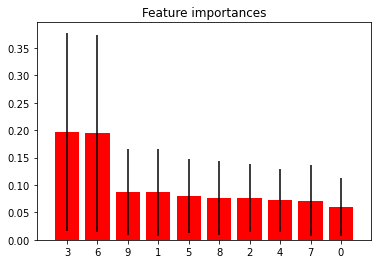

In [31]:
## Prediction Feature Ranking
# importance is calculated for each feature (predictor)

importances = regr.feature_importances_

std = np.std([tree.feature_importances_ for tree in regr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()